# Missing Value Analysis

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

base_dir = os.path.join(os.getcwd(), os.pardir)

Load in the data

In [2]:
data_path = os.path.join(base_dir, "data/altered/maps_feature_mapping.csv")
df = pd.read_csv(data_path, index_col="X")
features = df.columns

print(f"{df.shape[1]} features, {df.shape[0]} entries")
df.head()

82 features, 13734 entries


comp_bed_9  mat_dep  mat_age  weight_16   height_16     iq  \
X                                                               
1         NaN      3.0     30.0  59.294132  181.602831  107.0   
2         NaN      9.0     26.0        NaN         NaN   85.0   
3         NaN      3.0     24.0        NaN         NaN    NaN   
4         0.0      NaN     22.0  49.812426  160.224186    NaN   
5         0.0      8.0     31.0  62.270030  191.703227  132.0   

   comp_noint_bed_16  comp_int_bed_16  talk_phon_wend  text_wend  ...  \
X                                                                 ...   
1                NaN              NaN             1.0        1.0  ...   
2                NaN              NaN             NaN        NaN  ...   
3                NaN              NaN             NaN        NaN  ...   
4                NaN              NaN             NaN        NaN  ...   
5                1.0              NaN             0.0        0.0  ...   

   dep_score  comp_house  tv_bed_16  creat_14  comp_games  fam_tv_eve  \
X                                                                       
1        0.0         1.0        1.0       1.0         0.0         1.0   
2        NaN         NaN        NaN       NaN         NaN         NaN   
3        NaN         NaN        NaN       NaN         NaN         1.0   
4        NaN         NaN        NaN       NaN         0.0         NaN   
5        NaN         NaN        NaN       1.0         0.0         1.0   

   fam_tv_aft  fam_tv_mor  sex  birth_order  
X                                            
1         0.0         2.0  0.0          0.0  
2         NaN         NaN  0.0          1.0  
3         2.0         0.0  1.0          0.0  
4         NaN         NaN  1.0          0.0  
5         2.0         2.0  0.0          0.0  

[5 rows x 82 columns]

## Missing value analysis

Missing values plauge data science projectsLets see how many data entries are missing.

In [3]:
total_count = df.size
total_na_count = df.isna().sum().sum()
print(f"Total missing entries: {total_na_count} / {total_count} ({100*total_na_count/total_count:.2f}%)")

Total missing entries: 563352 / 1126188 (50.02%)


We can also check this per feature.

In [4]:
na_counts = df.isna().sum().sort_values(ascending=False).copy()
counts_df = pd.DataFrame(df.columns, columns=["feature"])
counts_df.set_index("feature")
counts_df["na_count"] = na_counts.values
counts_df["percentage_missing"] = 100 * counts_df.na_count / len(df)
counts_df

for i, count in counts_df.iterrows():
    print(f"{count.feature}: {count.percentage_missing:.2f}%")

comp_bed_9: 96.57%
mat_dep: 94.81%
mat_age: 86.86%
weight_16: 81.29%
height_16: 71.77%
iq: 68.06%
comp_noint_bed_16: 67.14%
comp_int_bed_16: 67.14%
talk_phon_wend: 67.14%
text_wend: 67.14%
talk_mob_wend: 67.14%
comp_wend: 64.89%
musi_wend: 64.82%
read_wend: 64.81%
work_wend: 64.80%
alon_wend: 64.80%
draw_wend: 64.77%
play_wend: 64.75%
tv_wend: 64.74%
out_win_wend: 64.69%
out_sum_wend: 64.69%
tran_wend: 64.69%
talk_phon_week: 64.69%
text_week: 64.66%
talk_mob_week: 64.61%
comp_week: 63.81%
musi_week: 63.67%
read_week: 63.64%
work_week: 63.60%
alon_week: 63.57%
draw_week: 63.56%
play_week: 63.54%
tv_week: 63.54%
out_win_week: 63.51%
out_sum_week: 63.51%
tran_week: 63.51%
pat_pres_10: 63.49%
pat_pres_8: 63.48%
pat_pres: 63.48%
num_home: 63.45%
mat_anx_1: 63.42%
mat_anx_18m: 61.42%
mat_anx_8m: 61.39%
agg_score: 61.04%
emot_cruel: 60.94%
phys_cruel: 56.59%
mat_anx_0m: 55.36%
pat_ses: 49.91%
mat_ses: 49.01%
pat_edu: 48.35%
mat_edu: 47.88%
parity: 46.93%
dep_band_15: 44.09%
dep_band_13: 43.72

Plot the missing features.

/home/kai/anaconda3/envs/ds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


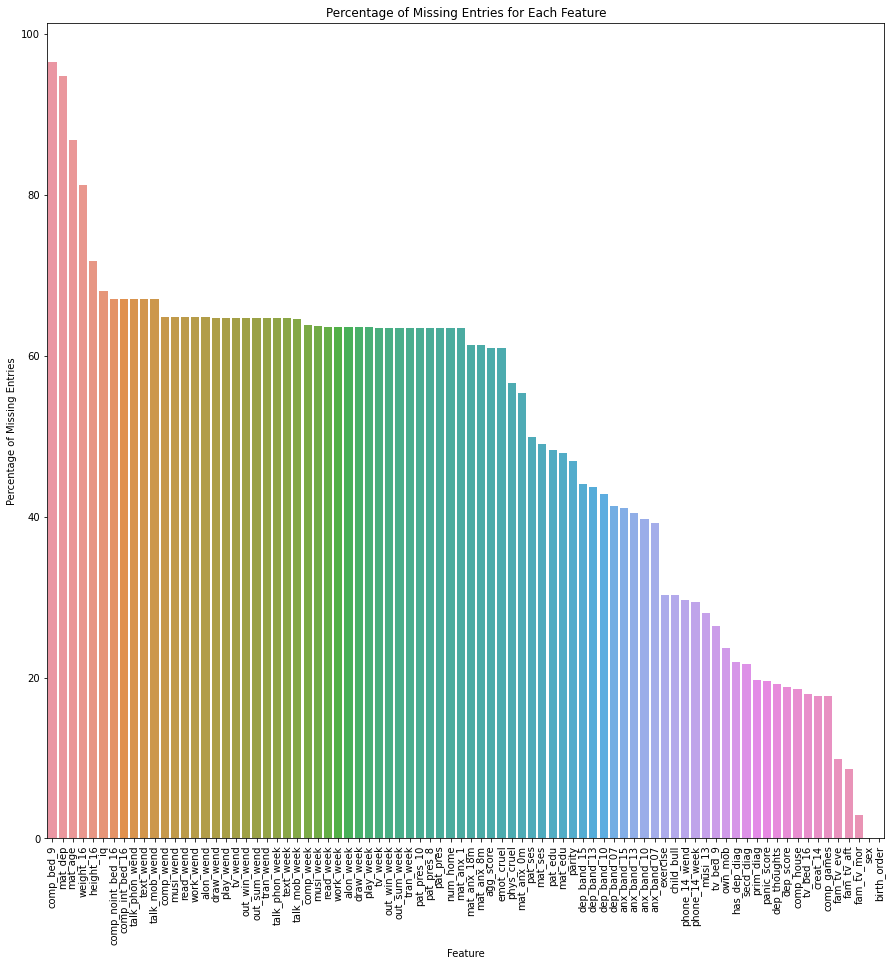

In [5]:
barplot_df = counts_df["percentage_missing"].to_numpy()

barplt_path = os.path.join(base_dir, "figures/missing_from_features_barplot.png")

fig, ax = plt.subplots(figsize=(15, 15))
plt.title("Percentage of Missing Entries for Each Feature")
plt.xticks(rotation=90)
sns.barplot(counts_df['feature'], counts_df['percentage_missing'])
plt.xlabel("Feature")
plt.ylabel("Percentage of Missing Entries")

plt.savefig(barplt_path, bbox_inches="tight", facecolor="white")

Lets get the fully complete features.

In [6]:
# print(f"number of features with missing entries: {na_col_count} of {df.shape[1]} total features ({100*na_col_count/df.shape[1]:.0f}%).")
print("\nfully complete features:\n")
for na_count, feature in zip(na_counts, features):
    if na_count == 0:
        print(f"\t- {feature}")


fully complete features:

	- sex
	- birth_order


Apart from `sex` and `birth_order` it seems most of the features have missing entries.

Lets visualise the percentage missing from features in a histogram.

Below is a histogram showing the distribution of the percentage of missing entries from features.

<AxesSubplot:>

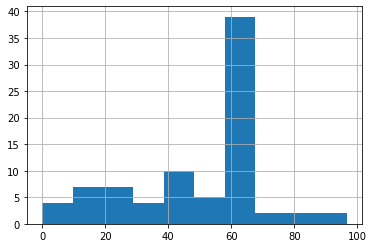

In [7]:
counts_df.percentage_missing.hist()

Around 40% of the entreis have between 60-70% of the features missing. There is no way we could simply drop features to remove NaNs as there are simply too many missing values.

We can also do the same for the entries themselves. Below is a histogram showing the distribution of the percentage of missing features from entries.

missing_feature_entries  percentage_missing_feature_entries  \
X                                                                    
34                           3                            3.658537   
36                           4                            4.878049   
62                           3                            3.658537   
67                           4                            4.878049   
120                          4                            4.878049   
...                        ...                                 ...   
13645                        4                            4.878049   
13672                        4                            4.878049   
13695                        3                            3.658537   
13717                        3                            3.658537   
13721                        3                            3.658537   

                                        missing_features  
X                                                         
34            [comp_int_bed_16, mat_anx_18m, comp_house]  
36     [comp_noint_bed_16, own_mob, dep_thoughts, com...  
62     [comp_noint_bed_16, comp_int_bed_16, dep_thoug...  
67     [comp_noint_bed_16, own_mob, comp_house, tv_be...  
120    [comp_noint_bed_16, own_mob, comp_house, tv_be...  
...                                                  ...  
13645  [comp_noint_bed_16, comp_int_bed_16, dep_thoug...  
13672  [comp_noint_bed_16, comp_int_bed_16, own_mob, ...  
13695           [comp_noint_bed_16, own_mob, comp_house]  
13717      [comp_noint_bed_16, dep_thoughts, comp_house]  
13721            [comp_noint_bed_16, own_mob, tv_bed_16]  

[795 rows x 3 columns]

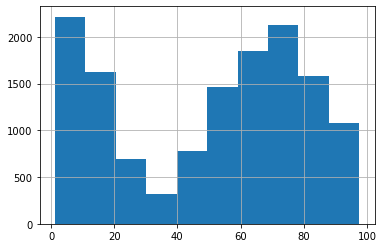

In [8]:
na_entries = df.isna().sum(axis=1)
na_entries_df = pd.DataFrame(na_entries, columns=['missing_feature_entries'])
na_entries_df['percentage_missing_feature_entries'] = 100 * na_entries_df.missing_feature_entries / len(features)

# na_entries_df['features_missing'] = 

na_entries_df.percentage_missing_feature_entries.hist()

missing_features = [[x for x in xs if not x == ''] for xs in (df.isna() * df.columns).values.tolist()]
na_entries_df['missing_features'] = missing_features

na_entries_df[na_entries_df["missing_feature_entries"] < 5]


In [9]:
na_entries_df[na_entries_df["missing_feature_entries"] < 3]

missing_feature_entries  percentage_missing_feature_entries  \
X                                                                    
217                          1                            1.219512   
236                          2                            2.439024   
243                          2                            2.439024   
527                          2                            2.439024   
654                          2                            2.439024   
...                        ...                                 ...   
13270                        2                            2.439024   
13394                        2                            2.439024   
13444                        2                            2.439024   
13447                        2                            2.439024   
13599                        2                            2.439024   

                           missing_features  
X                                            
217                     [comp_noint_bed_16]  
236         [comp_noint_bed_16, comp_house]  
243    [comp_noint_bed_16, comp_int_bed_16]  
527                 [own_mob, dep_thoughts]  
654    [comp_noint_bed_16, comp_int_bed_16]  
...                                     ...  
13270     [comp_noint_bed_16, dep_thoughts]  
13394  [comp_noint_bed_16, comp_int_bed_16]  
13444       [comp_noint_bed_16, comp_house]  
13447       [comp_noint_bed_16, comp_house]  
13599       [comp_noint_bed_16, comp_house]  

[91 rows x 3 columns]

## Analysis with `missingno`

We shall use the package `missingno` to further analyse the missing data in our dataset.

Text(0.5, 1.0, 'Number of Values for Each Feature')

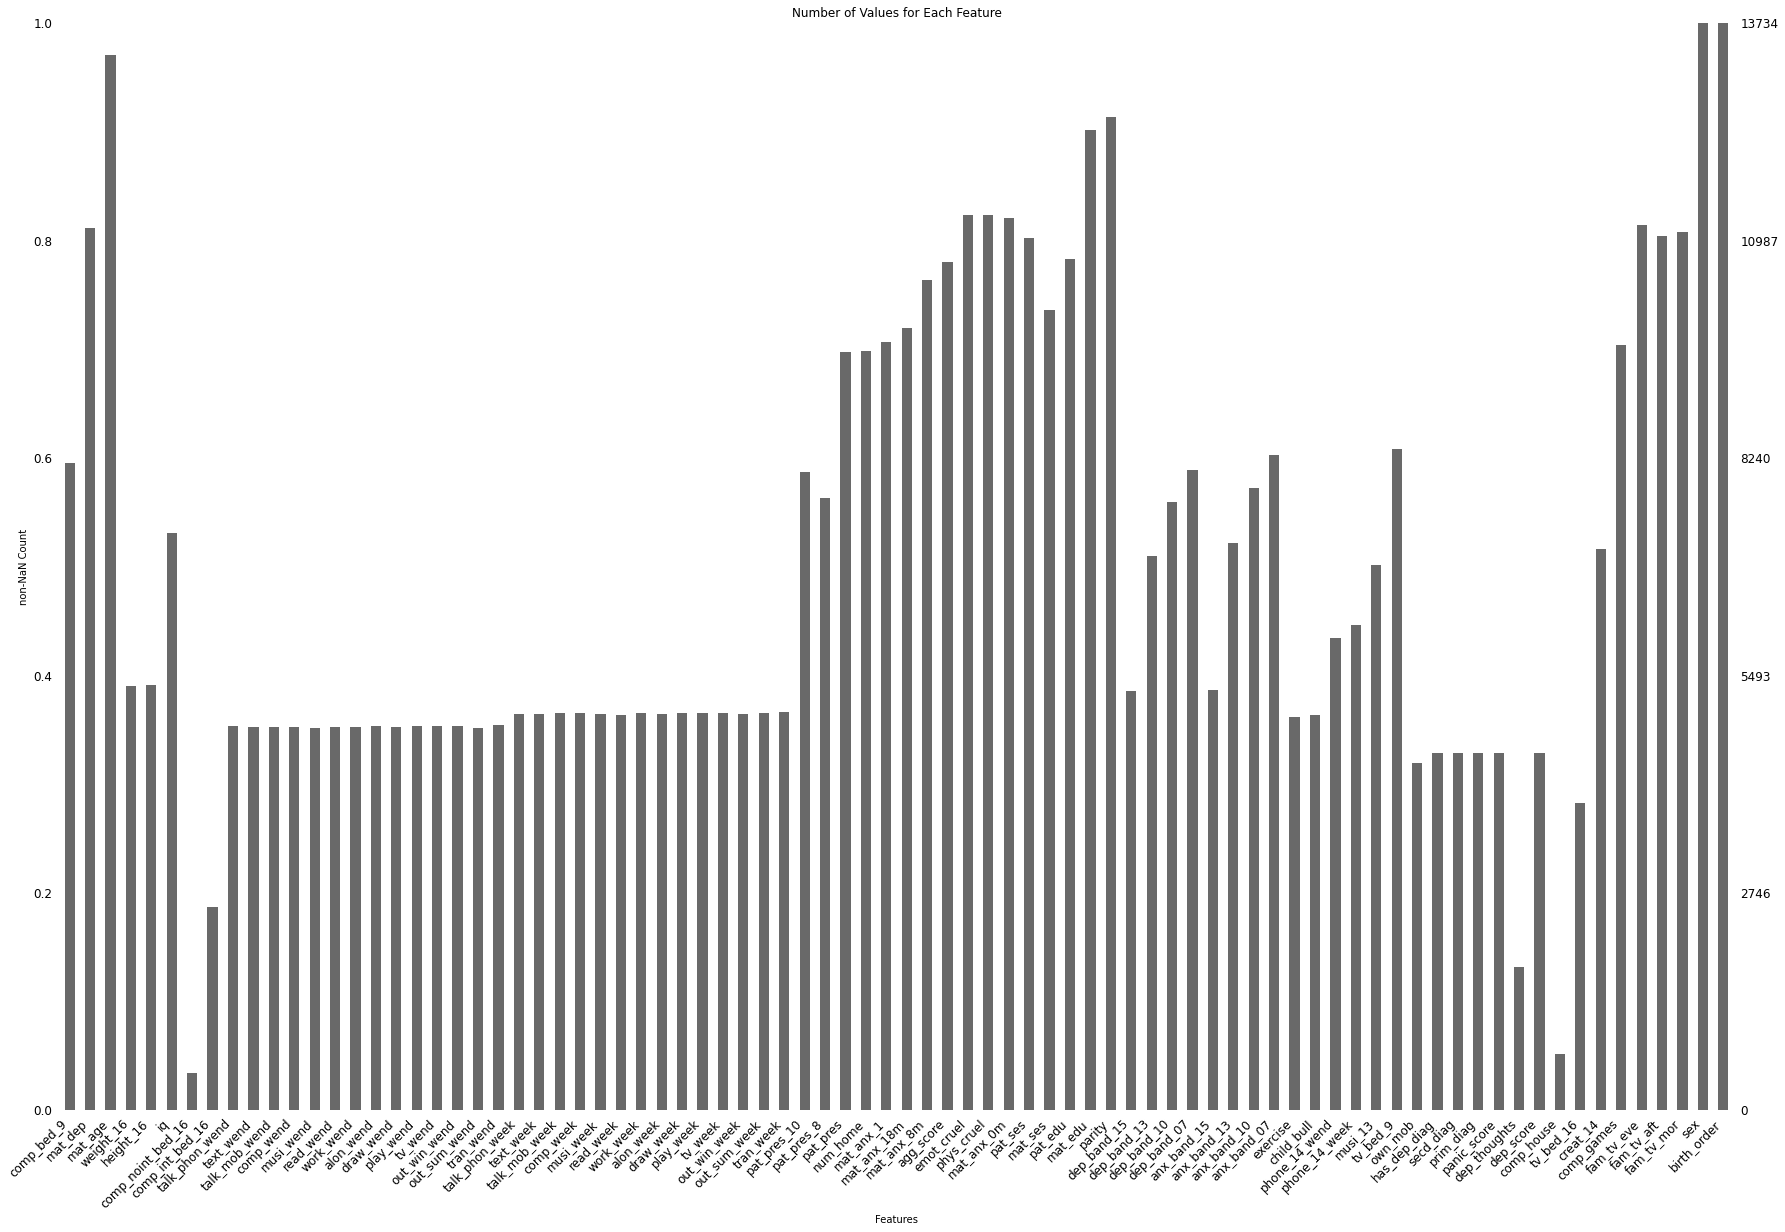

In [10]:
plt.xlabel("Features")
plt.ylabel("non-NaN Count")
msno.bar(df, labels=True, figsize=(30,20), fontsize=12)
plt.xticks([])
plt.title("Number of Values for Each Feature")

### Missing data matrix

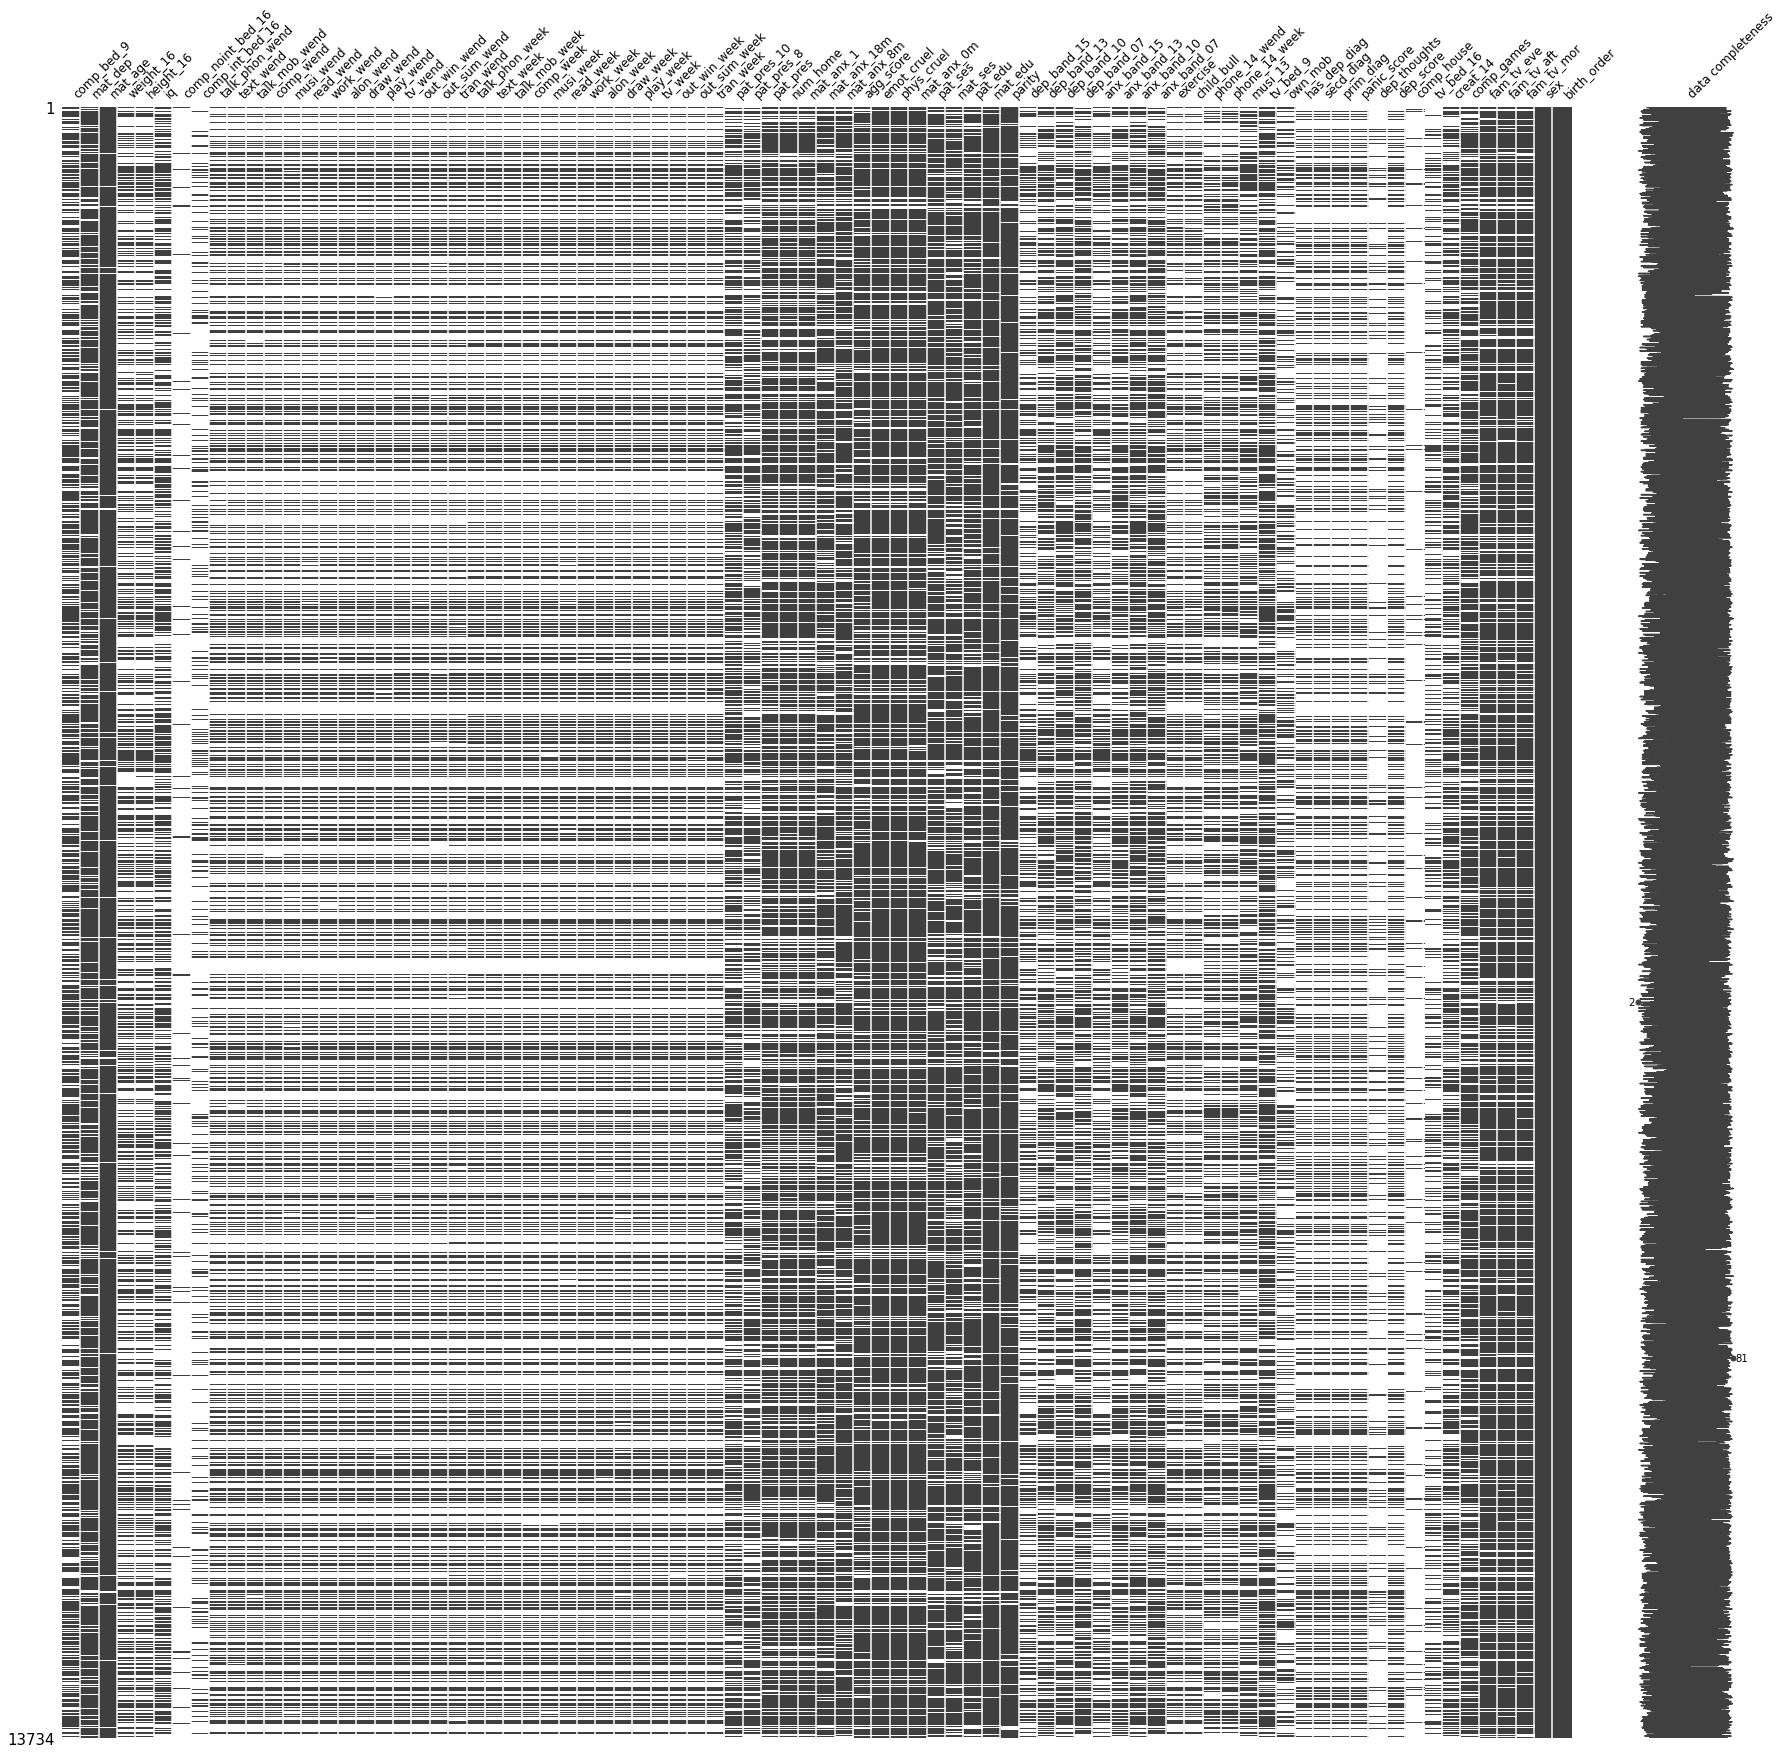

In [11]:
msno_matrix_path = os.path.join(base_dir, "figures/msno_matrix.png")
msno.matrix(df, labels=True, figsize=(30,30), fontsize=12)
plt.savefig(msno_matrix_path, bbox_inches="tight", facecolor="white")

#### `explain matrix` in terms of MAR MCAR and MNAR

We can look at the correlation of NaNs in the data with a heatmap. A high correlation between NaNs suggests than a NaN being present in one feature means a NaN is likely in the other, this is also the case for non-NaNs. A high negative correlation would suggest the opposite, with a NaN occuring suggesting a value occurs in the other and vice versa.

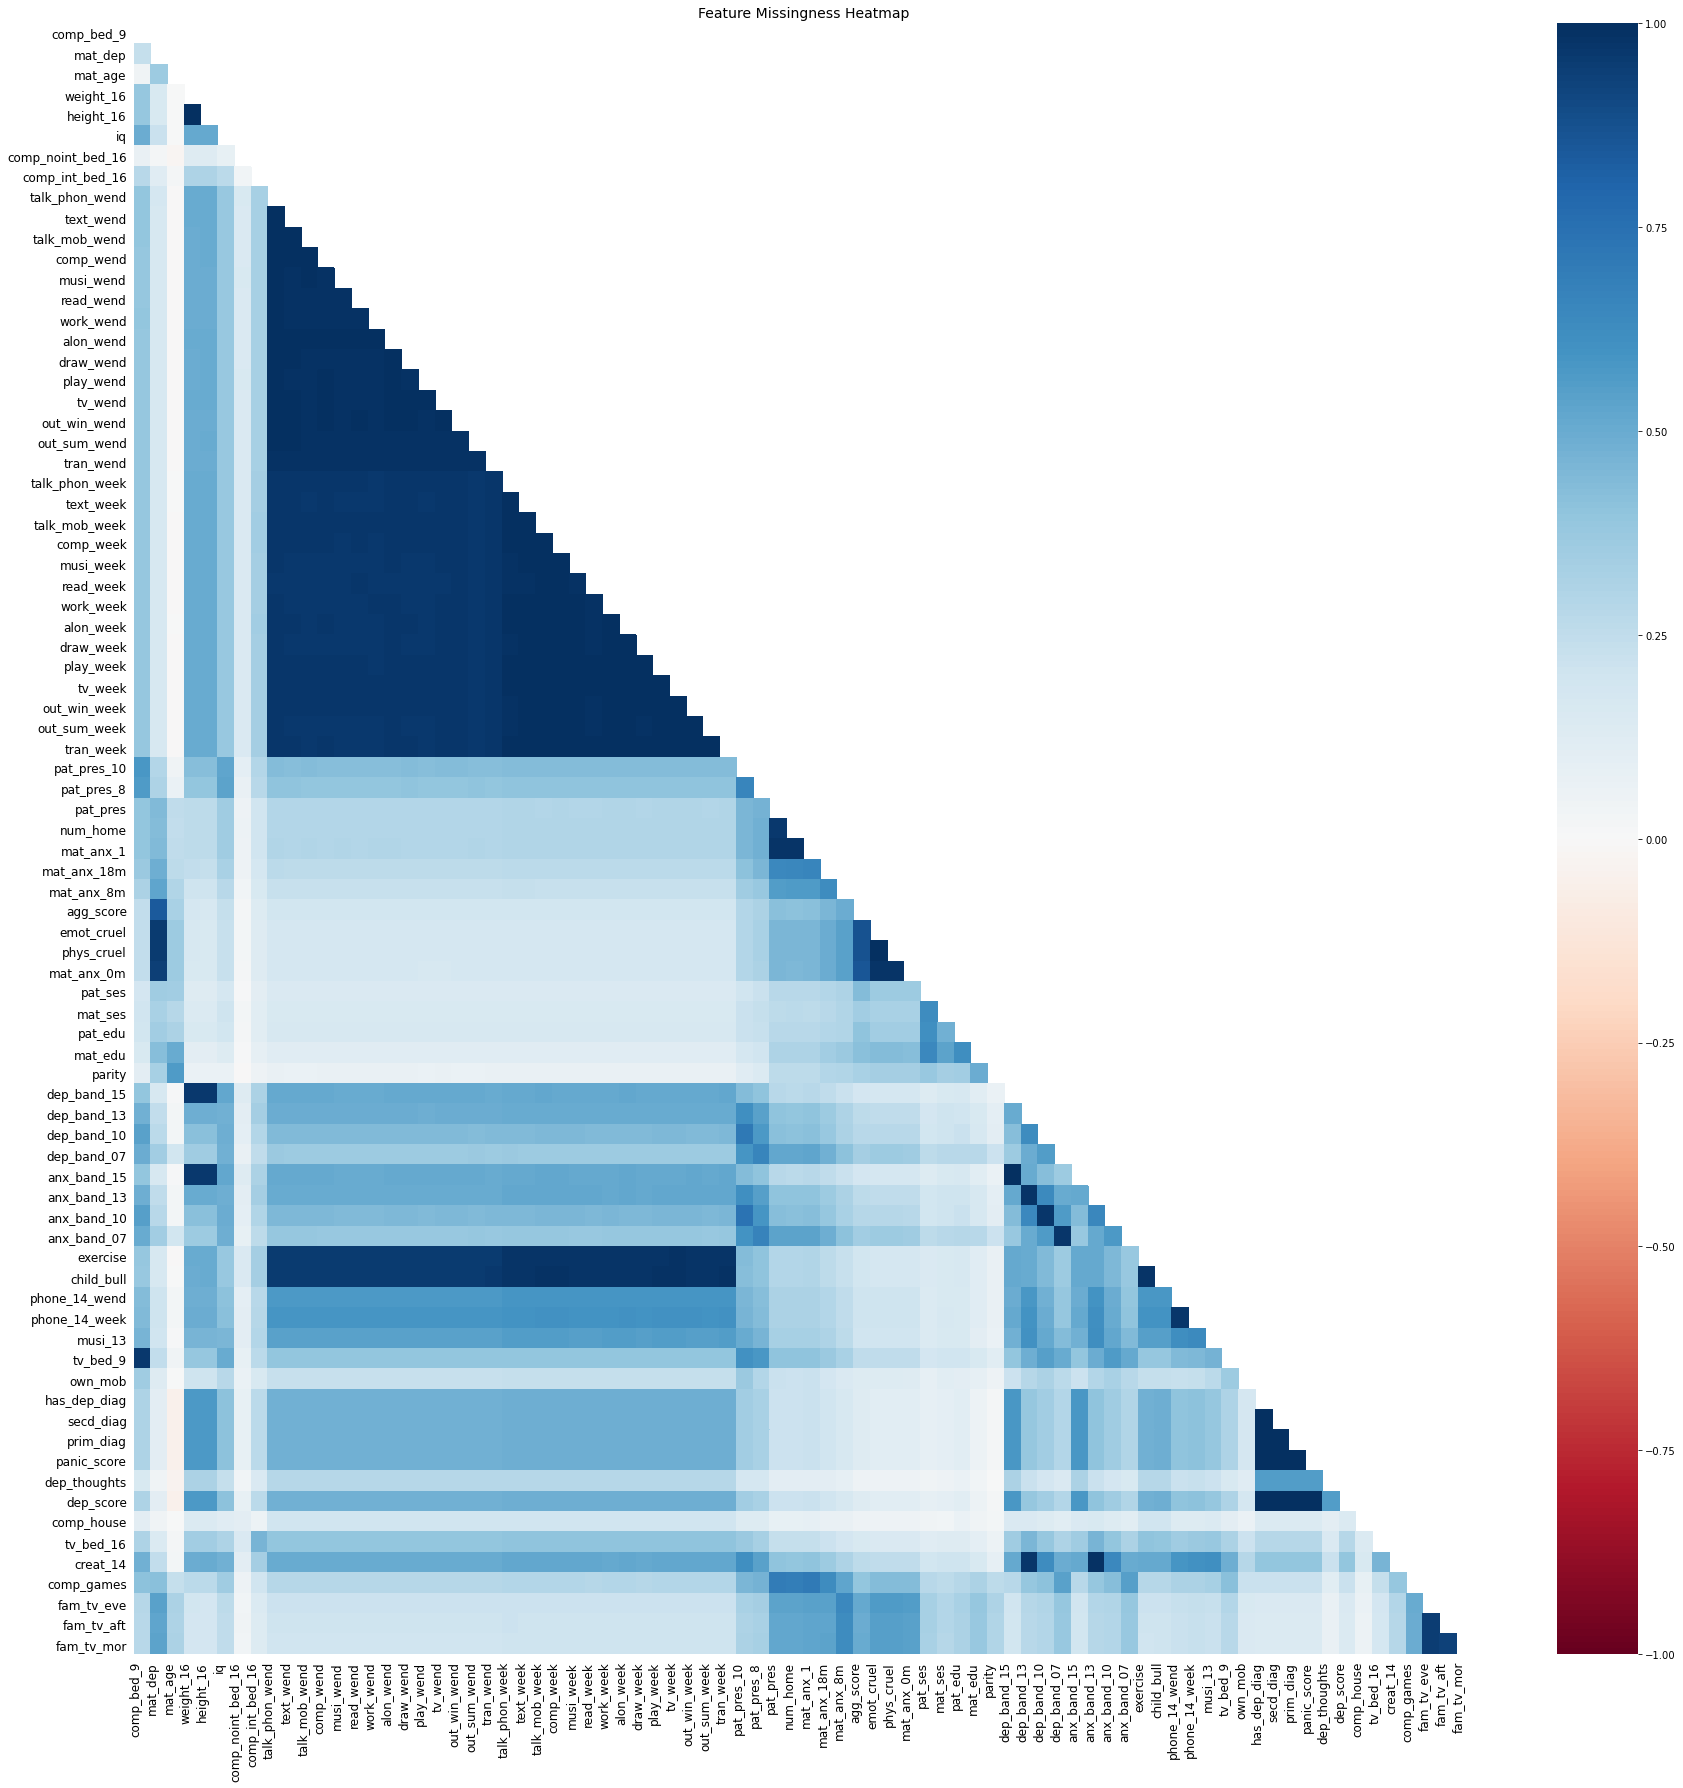

In [12]:
msno_heatmap_path = os.path.join(base_dir, "figures/msno_heatmap.png")

msno.heatmap(df, labels=False, fontsize=12, figsize=(30,30))
plt.xticks(rotation=90)
plt.title("Feature Missingness Heatmap", fontsize=14)
plt.savefig(msno_heatmap_path, bbox_inches="tight", facecolor="white")

#### `explain correlation of NaNs` lots of highly+ no highly-

We can see similar correlations with a dendrogram. Similar features are grouped together by heierarchical clustering and plotted in a tree structure.

<AxesSubplot:>

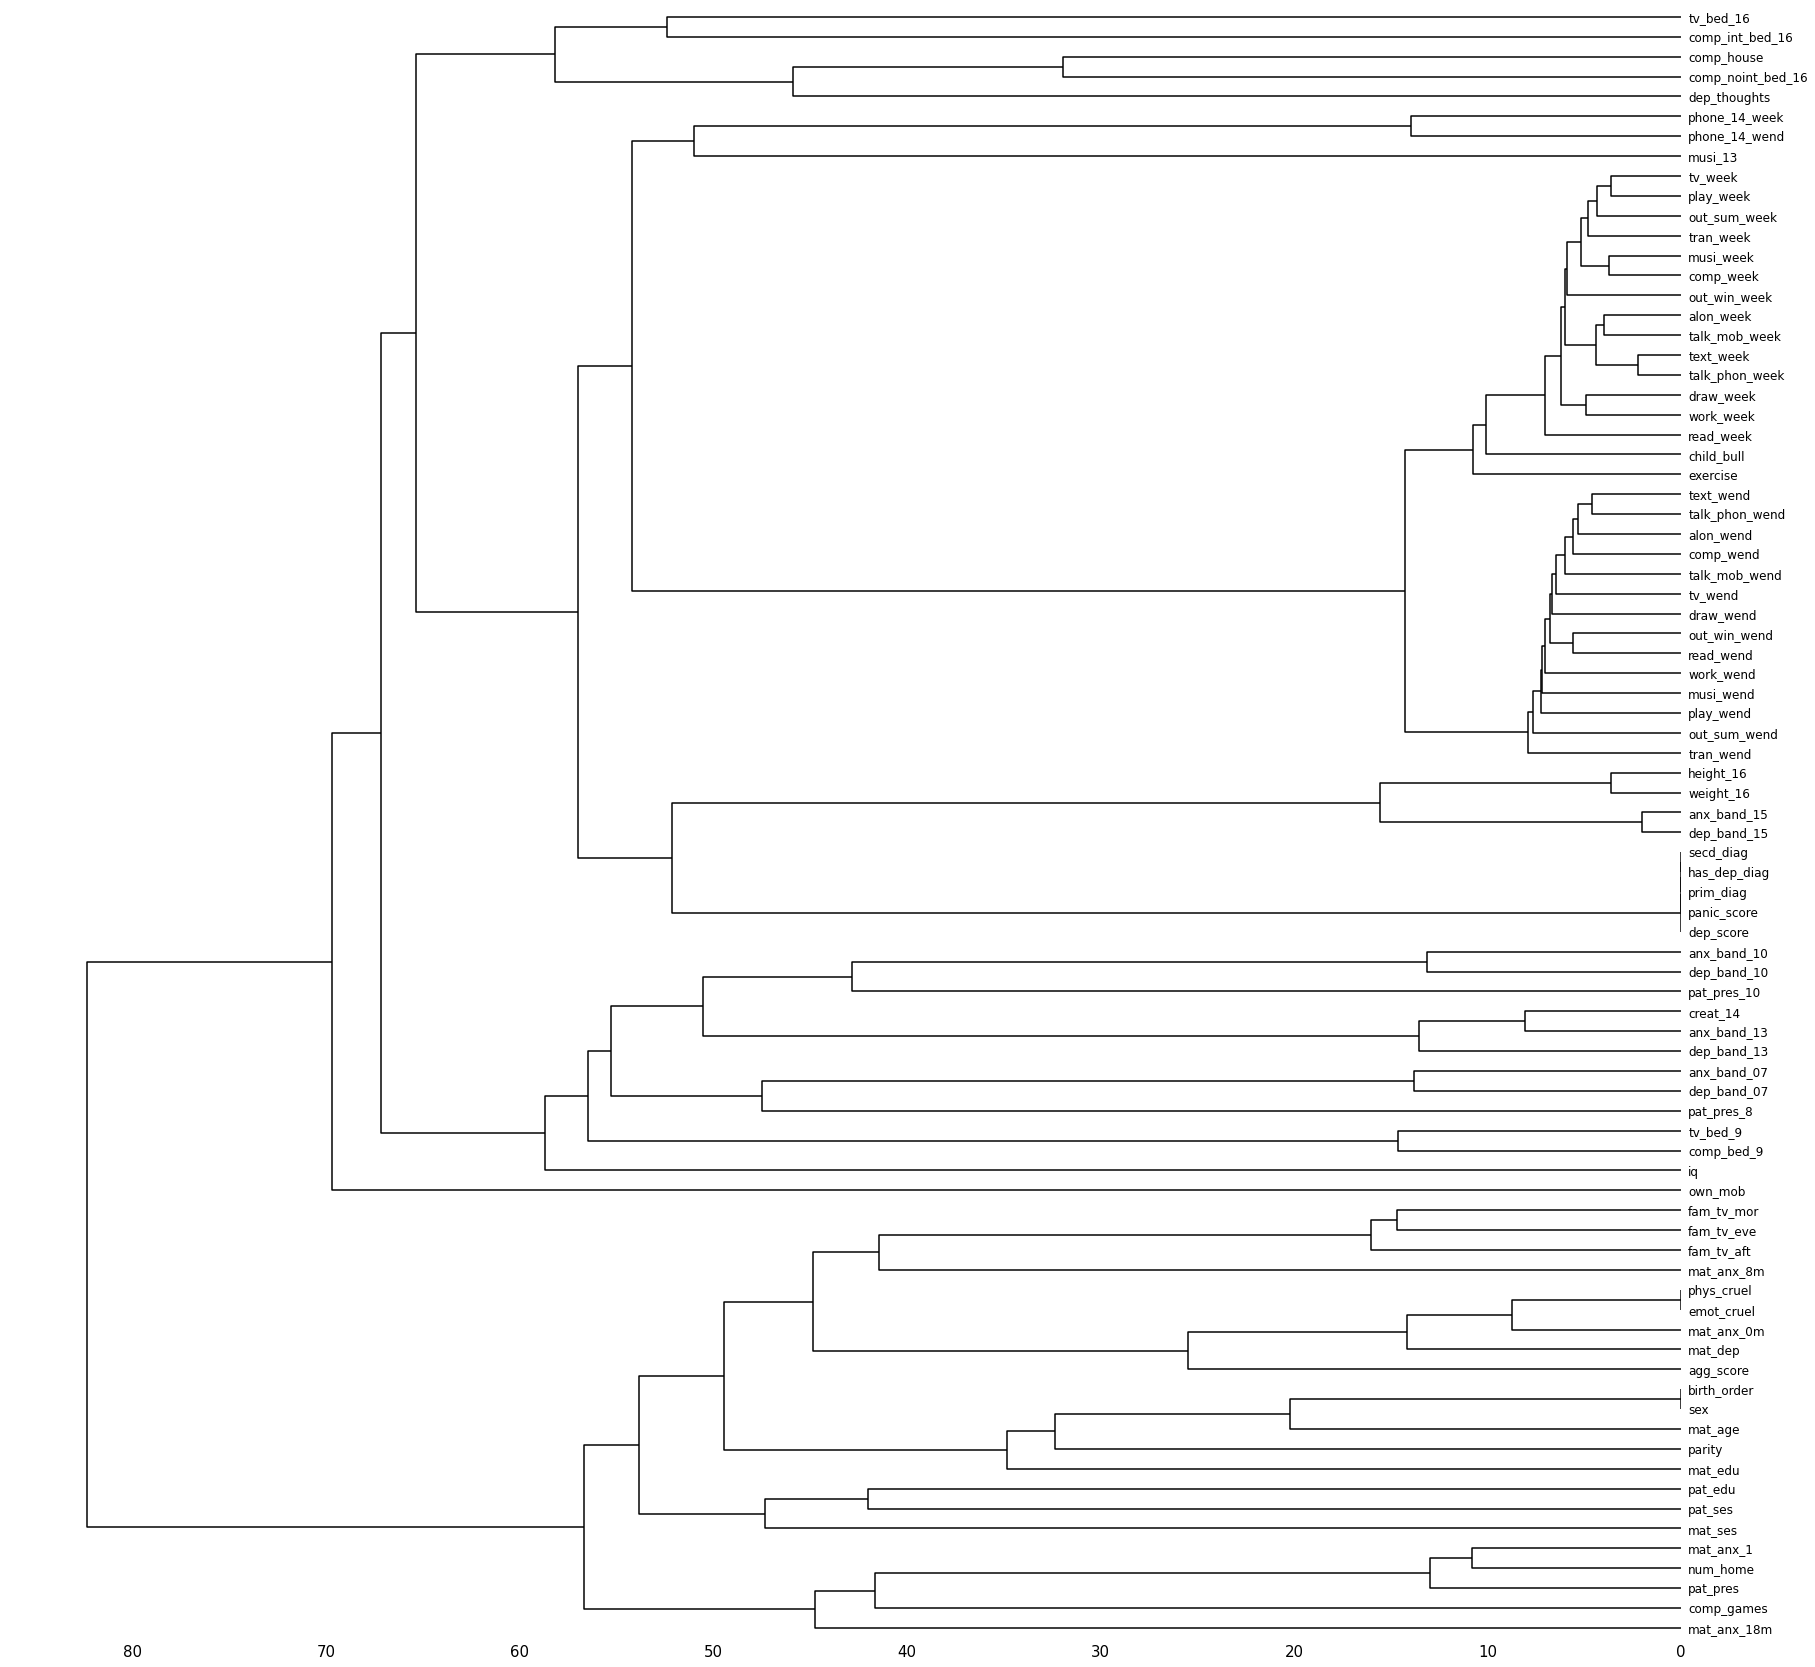

In [13]:
msno.dendrogram(df, figsize=(30,30), fontsize=12)

#### `explain dendrogram`

## Analysis of single value features

Some of the features in the dataset only have one unique value other than NaN. This is an issue for any automated imputation technique we use as it will set all entries to that single unique value resulting in a feature that no longer holds any information.

Lets find the features that have only one unique value that is not NaN.

In [15]:
for col in df:
    unique = df[col].unique()
    unique_len = len(unique)
    if np.isnan(unique).any() and unique_len < 3:
        print(f"{col}: {unique_len} {unique}")

comp_noint_bed_16: 2 [nan  1.]
comp_int_bed_16: 2 [nan  1.]
comp_house: 2 [ 1. nan]
tv_bed_16: 2 [ 1. nan]


The NaNs in these features are most certainly MNAR. Looking at the data description it seems that the survey only included an option for 'Yes', so it makes sense that some participants didn't fill in this feature as to signify no. However, due to the high number of NaN entries throughout the rest of the features we wouldn't want to set all NaN to 'No' as this is likely not representative of the data had there been a 'No' option. Instead we shall find a way to set some of the rows which are most likely to be No and leave the rest as NaN to allow another imputation method to fill in the rest. This should give a more natural distribution across 'Yes' and 'No'.

First lets replot the missing feature bar plot from earlier with only these features.

<AxesSubplot:title={'center':'Value Counts of Single Entry Features'}>

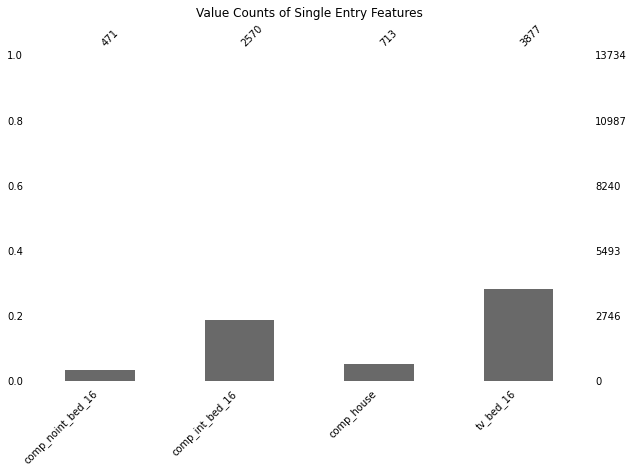

In [16]:
single_opts = ["comp_noint_bed_16", "comp_int_bed_16", "comp_house", "tv_bed_16"]
single_df = df[single_opts]

plt.title("Value Counts of Single Entry Features")
msno.bar(single_df, figsize=(10,6), fontsize=10)

Most of the values are missing from these features, so as mentioned above it would not be a good idea to simply impute all NaN as No.

Lets also look at the missing data matrix.

<AxesSubplot:>

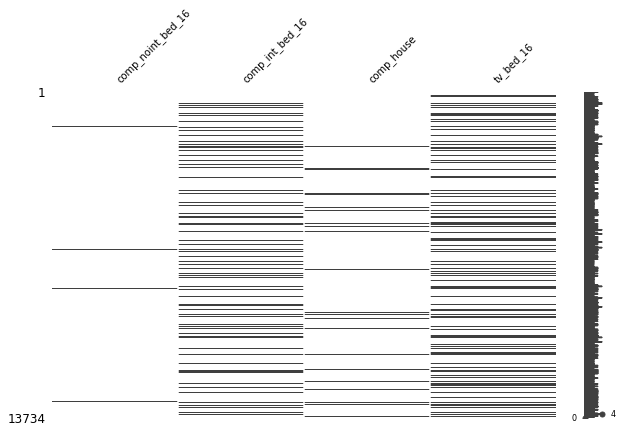

In [17]:
msno.matrix(single_df, figsize=(10,6), fontsize=10)

This also does not give us much information due to the large amount of missing data. There doesn't seem to be a clear pattern between the missing values in these features.

### Correlations with NaN as No

Because of the NaN values in these features previous correlation heatmaps did not show the features we shall fill all NaNs as no and then plot the new heatmap.

<ipython-input-169-ed0d75c40994>:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 0.89, 1])


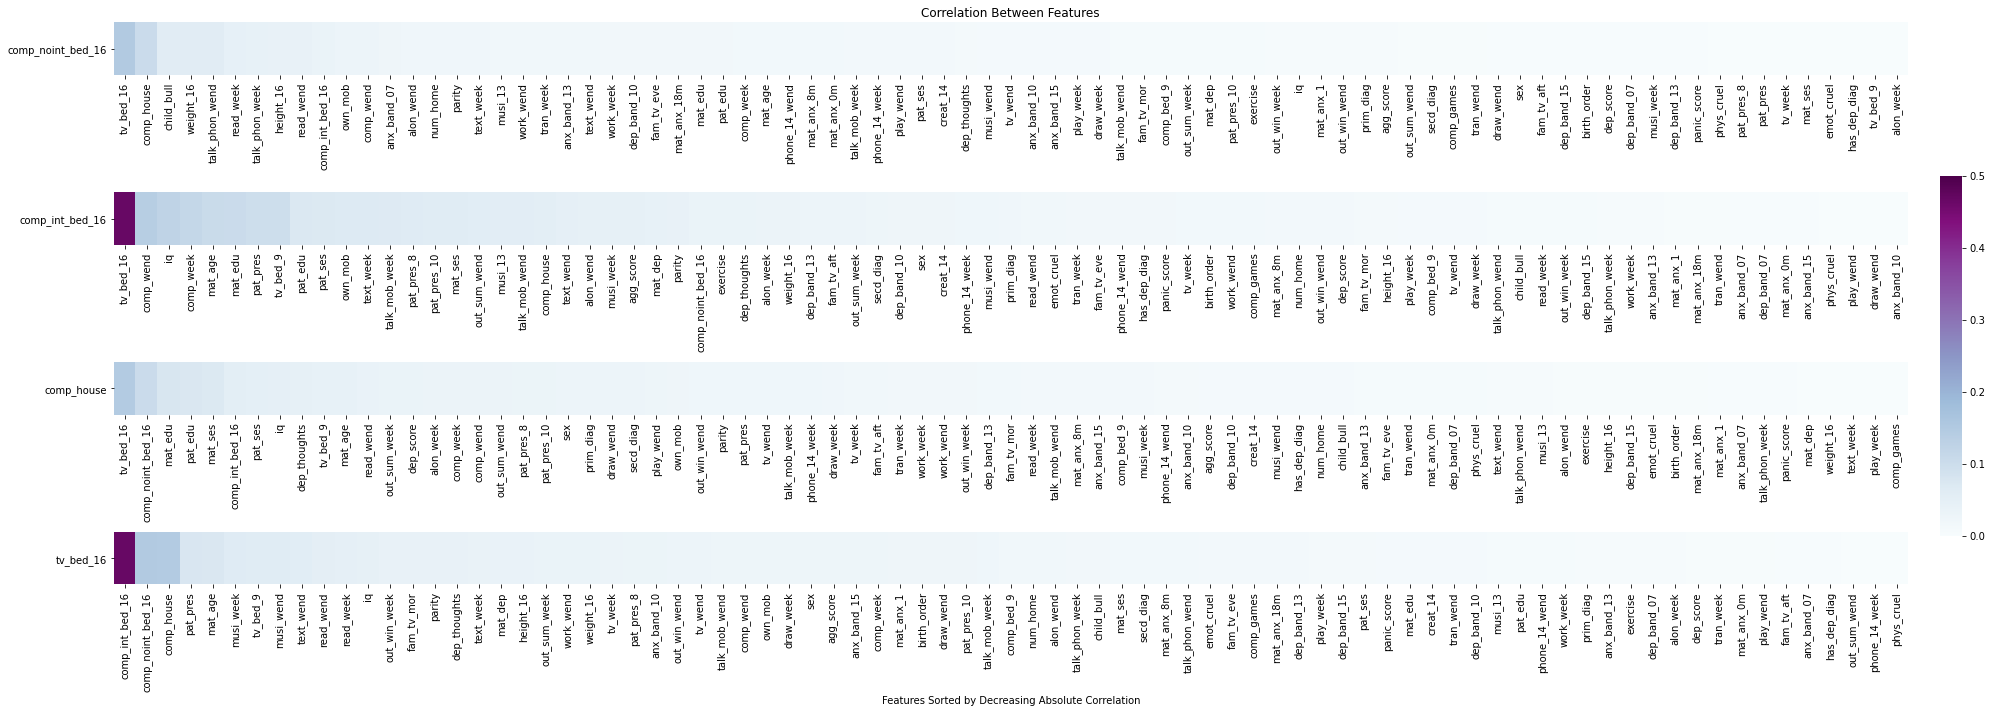

In [169]:
filled_df = df.copy()
filled_df[single_opts] = single_df.fillna(0.0)
filled_corr = filled_df.corr()

fig = plt.figure(figsize=(30,10))
plt.title("Correlation Between Features")
plt.xticks([])
plt.yticks([])
plt.box(None)
cbar_ax = fig.add_axes([0.9, 0.25, 0.01, 0.5])
for i, feature in enumerate(single_opts):
    fig.add_subplot(4, 1, i+1)
    heat_df = pd.DataFrame(filled_corr[feature]).abs().sort_values(feature, ascending=False).drop(feature)
    sns.heatmap(heat_df.T, cmap='BuPu', vmin=0, vmax=0.5, cbar=i==0, cbar_ax=cbar_ax if i==0 else None)
    xlabel = plt.xlabel(xlabel="Features Sorted by Decreasing Absolute Correlation" if i==3 else None)
    plt.yticks(rotation=0)
fig.tight_layout(rect=[0, 0, 0.89, 1])

For each of the target features the (absolute) correlation for each feature has been plotted in descending order excluding its correlation with itself.

Note that the colour bar only goes up to a correlation of 0.4 with most of the correlations being under 0.1. Due to the large number of missing value which are now all `0`, it seems features do not correlate well - likely due to how skewed towards 'No` the feature now are.

## Logical substitutions

Rather than calculate correlations between NaNs and other values it may make more sense to infer values based on the meaning of the feature and how it relates to other features.

Take `comp_int_bed_16` and `comp_noint_bed_16` for example. One states whether the subject has a computer in their room with internet and the other without. It is possible that they have both, but it is unlikely. 

It may make sense to impute `No` to `comp_noint_bed_16` when `comp_int_bed_16` is `Yes` and vice versa. This will still leave some NaN values, but should impute enough `No` values to these columns for other imputation methods to start working giving some more variability.

In [170]:
# check if the above hypothesis seems true in the data

Perform similar test for other logical substitutions.

In [ ]:
###